<a href="https://colab.research.google.com/github/aarongraybill/Math210/blob/main/ProblemSets/ProblemSet7/ProblemSet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 210
## Aaron Graybill
### Problem Set 6
### 4/8/21



In [2]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd

## Problem 1.


### a.
I convert the problem to a single source problem:

Edges: $\mathcal{E}=\left\{(0,1),(0,2),(0,4),(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(4,6),(5,4),(5,6)\right\}$.

Fix the flow on $(0,1),(0,2),(0,4)$ to $30,6,$ and $4$ respectively.

Let the currently unspecified constraint set be $\mathcal{C}$.

Maximize the flow into vertex $6$, so $\max_{x_{\mathcal{E}}\in\mathcal{C}}\left\{x_{46}+x_{56}\right\}$

We have the following constraint set:
\begin{align*}
x_{12}+x_{13}&=x_{01}\\
x_{23}+x_{24}+x_{25}&=x_{02}+x_{12}\\
x_{34}+x_{35}&=x_{13}+x_{23}\\
x_{45}+x_{46}&=x_{24}+x_{34}+x_{54}\\
x_{54}+x_{56}&=x_{25}+x_{35}+x_{45}\\
\end{align*}

In [3]:
a_eq=np.array([
            [1,0,-1,-1,-1,0,0,0,0,0,0],
            [0,1,1,0,0,-1,-1,0,0,0,0],
            [0,0,0,1,0,1,0,-1,-1,1,0],
            [0,0,0,0,1,0,1,1,0,-1,-1]])
print(a_eq)

b_eq=np.zeros((4))
print(b_eq)
a_leq=np.identity(11)
b_leq=[14,16,9,3,8,10,6,5,16,4,15]

c=[0,0,0,0,0,0,0,0,-1,0,-1]

linprog(c,A_ub=a_leq,b_ub=b_leq,A_eq=a_eq,b_eq=b_eq,method="simplex")


[[ 1  0 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  1  0  0 -1 -1  0  0  0  0]
 [ 0  0  0  1  0  1  0 -1 -1  1  0]
 [ 0  0  0  0  1  0  1  1  0 -1 -1]]
[0. 0. 0. 0.]


     con: array([0., 0., 0., 0.])
     fun: -27.0
 message: 'Optimization terminated successfully.'
     nit: 15
   slack: array([3., 0., 9., 0., 0., 0., 0., 4., 0., 0., 4.])
  status: 0
 success: True
       x: array([11., 16.,  0.,  3.,  8., 10.,  6.,  1., 16.,  4., 11.])

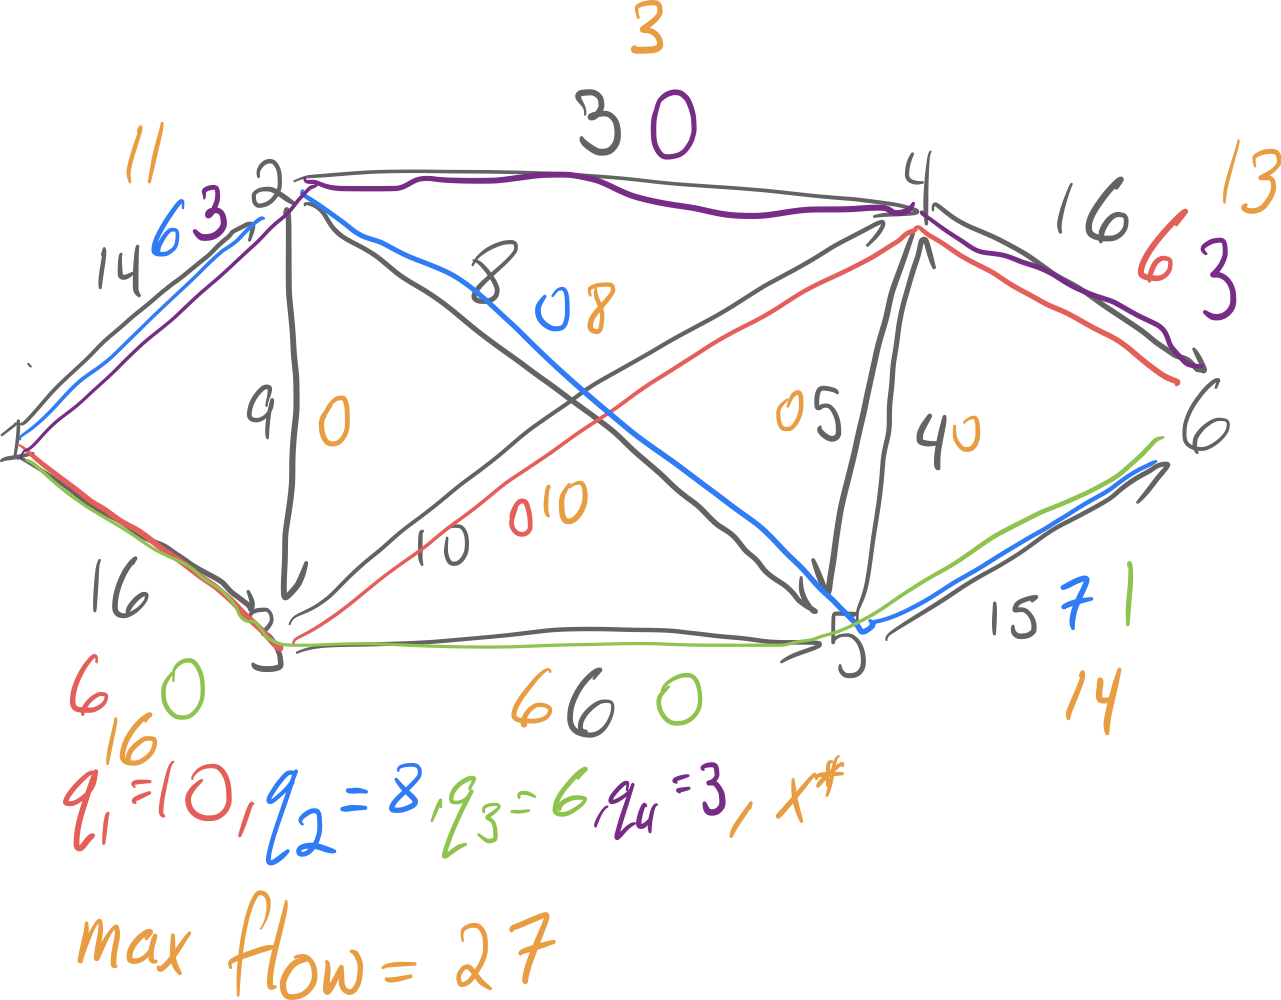

## Problem 2.
The optimal flows are in the first chart and the process is in the second: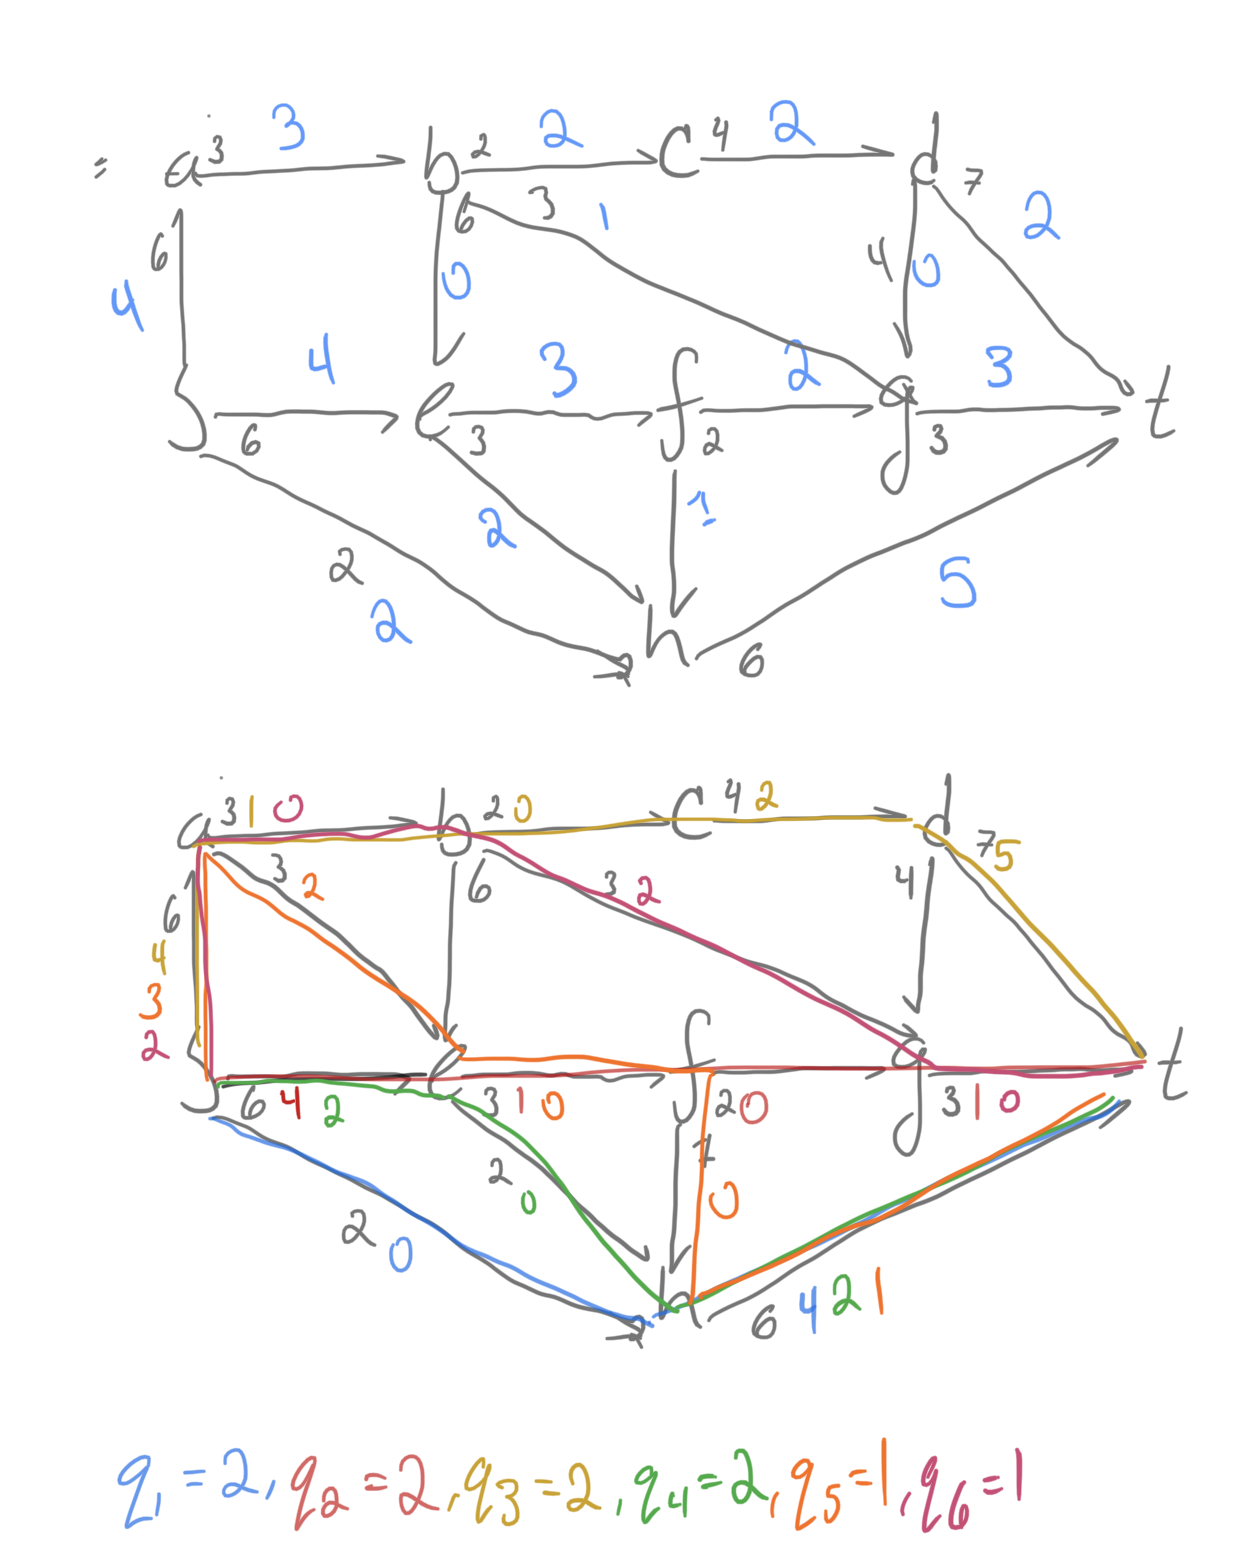


## Problem 3.


In [4]:
#used to make label names:
  #source: geeksforgeeks.org/python-insert-the-string-at-the-beginning-of-all-items-in-a-list/
def prepend(list, str):   
    
  # Using '% s'
  str += '% s'
  list =  [str % i for i in list]
  return(list)

In [5]:
import itertools

def create_eq_matrix(nvert,edgemat):

  A=np.zeros((nvert,(nvert**2)))  #too large will shrink later, 
                                  #but makes for easy indexing
  c=np.zeros(nvert**2) # ditto

  #loop over the edgemat, taking each path as an iterand
  for count, value in enumerate(edgemat[:,0:2]):

    col_num=(nvert)*(value[0])+(value[1]) # n columns from each vertex

    if (value[0]==0): #coming from source
      #Don't have to worry about constraint on sources
      A[value[1],col_num]=1
    elif (value[1]==(nvert-1)): #going to sink
      #dont have to worry about constraint on sink
      A[value[0],col_num]=-1
      c[col_num]=-1#Hey this is an important column, but it in the objective
    else: #intermediate
      A[value[1],col_num]=1
      A[value[0],col_num]=-1
  
  A=np.append(A,np.array([c]),axis=0) #add the row of cs

  #Name appropriately
  col_names=[] #create vector of names
  for i in itertools.product(np.arange(nvert),repeat=2): #all combos of indexes
    col_names += [str(i[0])+","+str(i[1])]
  row_names=prepend(np.arange(nvert),"V")
  row_names+="c" #add one final row name

  A=pd.DataFrame(A,index=row_names,columns=col_names)# put things into pd data

  # Remove unused rows and columns
  A=A.loc[(A != 0).any(axis=1), (A != 0).any(axis=0)]

  #separate A and c again
  c=A.iloc[-1:,:]
  A=A.iloc[:-1,:]

  #create easy matrices and vectors
  b_eq=np.zeros(A.shape[0])
  A_leq=np.identity(edgemat.shape[0])
  b_leq=edgemat[:,2]

  #do optimization
  optimal=linprog(c,A_eq=A,A_ub=A_leq,b_eq=b_eq,b_ub=b_leq,method="simplex")
  flows=np.array(np.array([optimal.x]))

  #generateoutput
  summary=pd.DataFrame(flows,index=["flow"],columns=A.columns)
  max="The maximum is: " +str(-optimal.fun)

  #print output and return
  print(max)
  return (summary,A)

### Problem 1 Confirmation

In [6]:
create_eq_matrix(6,edgemat=np.array([
                                  [0,1,14],
                                  [0,2,16],
                                  [1,2,9],
                                  [1,3,3],
                                  [1,4,8],
                                  [2,3,10],
                                  [2,4,6],
                                  [3,4,5],
                                  [3,5,16],
                                  [4,3,4],
                                  [4,5,15]]))[0]
            

The maximum is: 27.0


,"0,1","0,2","1,2","1,3","1,4","2,3","2,4","3,4","3,5","4,3","4,5"
flow,11.0,16.0,0.0,3.0,8.0,10.0,6.0,1.0,16.0,4.0,11.0


###  Problem 2 Confirmation.

In [7]:
create_eq_matrix(10,
                 np.array([
                           [0,1,6],
                           [0,5,6],
                           [0,8,2],
                           [1,2,3],
                           [1,5,3],
                           [2,3,2],
                           [2,5,6],
                           [2,7,3],
                           [3,4,4],
                           [4,7,4],
                           [4,9,7],
                           [5,6,3],
                           [5,8,2],
                           [6,7,2],
                           [6,8,1],
                           [7,9,3],
                           [8,9,6]
                           ]))[0]



The maximum is: 10.0


,"0,1","0,5","0,8","1,2","1,5","2,3","2,5","2,7","3,4","4,7","4,9","5,6","5,8","6,7","6,8","7,9","8,9"
flow,6.0,2.0,2.0,3.0,3.0,2.0,0.0,1.0,2.0,0.0,2.0,3.0,2.0,2.0,1.0,3.0,5.0


## Problem 4.


### a.


In [8]:
A_leq=np.identity(9)
A_eq=np.array([
              [1,0,-1,-1,0,0,0,0,0],
              [0,0,1,0,-1,-1,1,0,0],
              [0,1,0,1,0,0,-1,-1,0],
              [0,0,0,0,1,0,0,1,-1]
])

b_eq=np.zeros(4)
b_leq=[5,6,4,1,2,4,3,3,6]

tab=np.concatenate((A_eq,A_leq),axis=0)
b_full=np.transpose(np.array([np.append(b_eq,b_leq)]))

c=np.array([[0,0,0,0,0,1,0,0,1,0]])

tab=np.concatenate((tab,b_full),axis=1)
tab=np.concatenate((tab,c),axis=0)

print(tab)

indep_names=["x01","x03","x12","x13","x24","x25","x32","x34","x45"]
dep_names=["0","0","0","0","c01","c03","c12","c13","c24","c25","c32","c34","c45"]

indep_names_dual=["mu1","mu2","mu3","mu4","y01","y03","y12","y13","y24","y25","y32","y34","y45"]
dep_names_dual=["s01","s03","s12","s13","s24","s25","s32","s34","s45"]



[[ 1.  0. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1. -1.  1.  0.  0.  0.]
 [ 0.  1.  0.  1.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1. -1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  5.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  4.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  6.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.]]


In [9]:
def print_tableau(a,indep_names,dep_names,indep_names_dual,dep_names_dual):
#
# Given matrix "a" and lists of variables names "indep_names" and "dep_names",
#   and (for the dual) "indep_names_dual" and "dep_names_dual",
# this function prints the matrix and labels in standard tableau format
# (including adding the -1, the minus signs in the last column, and labeling the lower-right as obj)
#
# First, check the inputs: indep_names and dep_names_dual should be one shorter than the number of columns of A
#                          dep_names and indep_names_dual should be one shorter than the number of rows of A
#
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
    nindep = len(indep_names)
    nindep_dual = len(indep_names_dual)
    ndep = len(dep_names)
    ndep_dual = len(dep_names_dual)
    if nindep != ncols-1:
        print("WARNING: # of indep vbles should be one fewer than # columns of matrix")
    if ndep != nrows-1:
        print("WARNING: # of dep vbles should be one fewer than # rows of matrix")
    if nindep_dual != nrows-1:
        print("WARNING: # of indep dual vbles should be one fewer than # rows of matrix")
    if ndep_dual != ncols-1:
        print("WARNING: # of dep dual vbles should be one fewer than # columns of matrix")
# Now do the printing (uses a variety of formatting techniques in Python)     
    print("          ",end="")       # On first line, leave blank space so we can fit in dual labels lower down 
    for j in range(ncols-1):                    # Print the independent variables in the first row
        print(indep_names[j].rjust(10),end="")  # rjust(10) makes fields 10 wide and right-justifies;
                                                #    the end command prevents newline)
    print("        -1")                         # Tack on the -1 at the end of the first row
    for i in range(nrows-1):
        print(indep_names_dual[i].rjust(10),end="")
        for j in range(ncols):                  # Print all but the last row of the matrix
                print("%10.3f" % a[i][j],end="") # The syntax prints in a field 10 wide, showing 3 decimal points
        lab = "= -" + dep_names[i]
        print(lab.rjust(10))
    print("        -1",end="")
    for j in range(ncols):
        print("%10.3f" % a[nrows-1][j],end="")  # Print the last row of the matrix, with label "obj" at end
    lab = "= obj"
    print(lab.rjust(10))
    print("          ",end="")
    for j in range(ncols-1):
        lab = "=" + dep_names_dual[j]
        print(lab.rjust(10),end="")
    print("  =dualobj")
    print(" ")    # Put blank line at bottom

In [10]:
def pivot(a,pivrow,pivcol,indep_names,dep_names,indep_names_dual,dep_names_dual) :
# 
# Given matrix "a", a row number "pivrow" and column number "pivcol", 
#  and lists of variable names "indep_names" and "dep_names", this
#  function does three things:
#    (1) outputs the new version of the matrix after a pivot,
#    (2) updates the lists of variable names post-pivot
#    (3) prints the new matrix, including labels showing the variable names
#
# First, check the inputs: indep_names should be one shorter than the number of columns of A
#                          dep_names should be one shorter than the number of rows of A
#                          you should not be pivoting on the last row or last column
#
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
    nindep = len(indep_names)
    nindep_dual = len(indep_names_dual)
    ndep = len(dep_names)
    ndep_dual = len(dep_names_dual)
    if nindep != ncols-1:
        print("WARNING: # of indep vbles should be one fewer than # columns of matrix")
    if ndep != nrows-1:
        print("WARNING: # of dep vbles should be one fewer than # rows of matrix")
    if nindep_dual != nrows-1:
        print("WARNING: # of indep dual vbles should be one fewer than # rows of matrix")
    if ndep_dual != ncols-1:
        print("WARNING: # of dep dual vbles should be one fewer than # columns of matrix")
    if pivrow > nrows-1 or pivcol > ncols-1:
        print("WARNING: should not pivot on last row or column")
    newa = a.copy()       # make a copy of A, to be filled in below with result of pivot
    p = a[pivrow-1][pivcol-1]   # identify pivot element
    newa[pivrow-1][pivcol-1] = 1/p   # set new value of pivot element
    # Set entries in p's row
    for j in range(ncols):
        if j != pivcol-1:
            newa[pivrow-1][j]=a[pivrow-1][j]/p;
    # Set entries in p's column
    for i in range(nrows):
        if i != pivrow-1:
            newa[i][pivcol-1]=-a[i][pivcol-1]/p;
    # Set all other entries
    for i in range(nrows):
        for j in range(ncols):
            if i != pivrow-1 and j != pivcol-1:
                r = a[i][pivcol-1]
                q = a[pivrow-1][j]
                s = a[i][j]
                newa[i][j]=(p*s-q*r)/p
    # Now transfer the new tableau into a
    for i in range(nrows) :
        for j in range(ncols) :
            a[i][j] = newa[i][j]
    # Now swap the variable names
    temp = indep_names[pivcol-1]
    indep_names[pivcol-1]=dep_names[pivrow-1]
    dep_names[pivrow-1]=temp
    temp = indep_names_dual[pivrow-1]
    indep_names_dual[pivrow-1]=dep_names_dual[pivcol-1]
    dep_names_dual[pivcol-1]=temp
    print_tableau(newa,indep_names,dep_names,indep_names_dual,dep_names_dual) # Print the matrix with updated labels
    return 0;

In [11]:
def column_delete(a,col_to_remove,indep_names,dep_names,indep_names_dual,dep_names_dual) :
    import numpy as np
    anew = np.delete(a,col_to_remove-1,axis=1)
    del indep_names[col_to_remove-1]
    del dep_names_dual[col_to_remove-1]
    print_tableau(anew,indep_names,dep_names,indep_names_dual,dep_names_dual)
    return anew

In [12]:
def row_delete(a,row_to_remove,indep_names,dep_names,indep_names_dual,dep_names_dual) :
    import numpy as np
    anew = np.delete(a,row_to_remove-1,axis=0)
    del dep_names[row_to_remove-1]
    del indep_names_dual[row_to_remove-1]
    print_tableau(anew,indep_names,dep_names,indep_names_dual,dep_names_dual)
    return anew

In [13]:
def target(a) :
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in "a"
    ncols = a.shape[1]
    import numpy as np
    v = np.empty(ncols-1)
    for i in range(ncols-1):
        v[i]=a[nrows-1,i]
    biggest_c = np.max(v)
    where_is_biggest_c = np.argmax(v)+1
    if biggest_c > 0 :
        return where_is_biggest_c
    else :
        return -1

In [14]:
def select(a,pivcolnum) :
    nrows = a.shape[0]    # use the shape function to determine number of rows and cols in A
    ncols = a.shape[1]
# First task: work down the column and record the b/a ratios in a vector v
#     except record -1 if a is negative or zero
    import numpy as np
    v = np.zeros(nrows-1)
    for i in range(nrows-1):
        if a[i,pivcolnum-1]>0 :
            v[i] = a[i,ncols-1]/a[i,pivcolnum-1]
        else :
            v[i] = -1
# Second task: if max b/a > -1, find min b/a by hand (ignoring zero entries in v)
    if np.max(v) > -1 :  
        min_so_far = np.max(v)+1  # Initialize min to be for-sure bigger than the min
        for i in range(nrows-1):
            if v[i] > -1 and v[i] < min_so_far :
                min_so_far = v[i]
                where_is_min = i+1   # Add 1 to use human numbering
        return where_is_min      # Once we've scanned v for min, we can return result
            
    else :          # Otherwise, we find the m
        return -1

In [15]:
def simplexbf(a,indep_names,dep_names,dual_indep_names,dual_dep_names):
# Run the simplexbf algorithm
# Inputs: np.array "a" (assumed to be basic feasible)
#         lists of variable names indep_names and dep_names (pivot will catch if they're wrong size)
# Output: -1 if we stop because problem is unbounded, 0 if we continue to a solution
#         -9 if we take too many steps
    nrows = a.shape[0]    # use shape to find # of rows and cols in A
    ncols = a.shape[1]
    print("Starting SimplexBF (will do nothing if solution can already be determined)")
    pivcol = target(a)
    nsteps = 0
    while pivcol > -1 and nsteps < 50:  # Repeat until either solution found or 50 pivots completed
        pivrow = select(a,pivcol)
        if pivrow == -1 :
            return -1    # If select reports -1, problem is unbounded, so exit this function
        else :
            pivot(a,pivrow,pivcol,indep_names,dep_names,dual_indep_names,dual_dep_names)
            nsteps=nsteps+1
            pivcol = target(a)
    if nsteps >= 50:
        return -9    # we took too many pivots
    else:
        return 0

In [16]:
def targetnbf(a):
    nrows = a.shape[0]
    ncols = a.shape[1]
    import numpy as np
    checkrow = nrows-2
    while a[checkrow,ncols-1] >= -0.00000001 :
        if checkrow == 0 :   # if still in the "while" and at the top,
            return -1        # all the b's were >= 0, so return -1
        else :
            checkrow = checkrow-1
    return checkrow+1    # if we exit the "while", we found a negative
#                            b, so return current row # (in human numbering)

In [17]:
def selectnbf(a,targetrow) :
#  Given inputs "a" (tableau as an np.array, numbers only, no labels) 
#       and "targetrow" (a row that has a negative b; start-at-1 numbering assumed),
#  computes a pivot that could be chosen by SimplexNBF and 
#  outputs "pivrow" and "pivcol", the row and column (start-at-1 numbering) of that pivot
#  If the targeted row has no negative aij, returns -2 for both pivrow and pivcol
    nrows = a.shape[0]
    ncols = a.shape[1]
    import numpy as np
    targetrow = targetrow-1   # convert to start-at-0
    pivcol = ncols-2     # column index of last aij
    while a[targetrow,pivcol] >= 0 :
        if pivcol == 0 :   # if pivcol makes it to zero, all aij
            return [-2,-2]   # in this row were >= 0, so problem infeasible
        else :
            pivcol = pivcol-1
    minsofar = a[targetrow,ncols-1]/a[targetrow,pivcol] # we found a negative aij
    pivrow = targetrow     
    for i in range(targetrow+1,nrows-2):   # now check below it for a smaller bi/aij with aij>0
        if a[i,pivcol]>0 and a[i,ncols-1]/a[i,pivcol] < minsofar :
            minsofar = a[i,ncols-1]/a[i,pivcol]
            pivrow = i
    return [pivrow+1,pivcol+1]   # Return result (shifted to start-at-1 numbering)

In [18]:
def simplexnbf(a,indep_names,dep_names,dual_indep_names,dual_dep_names):
# Run the simplexnbf algorithm
# Inputs: np.array "a" 
#         lists of variable names indep_names and dep_names (pivot will catch if they're wrong size)
# Output: -2 if we stop because problem is infeasible, 0 if we stop at a basic feasible tableau
#.        -9 if we take too many pivots
#    (Also, the tableau "a" and variable-lists are updated with each pivot)
    nrows = a.shape[0]   
    ncols = a.shape[1]
    print("Starting SimplexNBF (will do nothing if already basic feasible)")
    nsteps = 0
    targetrow = targetnbf(a)
    while targetrow > -1 and nsteps < 50:  # Repeat until either basic feasible tableau produced or 50 pivots completed
        [pivrow,pivcol] = selectnbf(a,targetrow)
        if pivrow == -2 :
            return -2    # If selectnbf reports -2, problem is infeasible, so exit this function
        else :
            pivot(a,pivrow,pivcol,indep_names,dep_names,dual_indep_names,dual_dep_names)
            nsteps=nsteps+1
            targetrow = targetnbf(a)
    if nsteps >= 50:
        return -9    # took too many pivots
    else:
        return 0

In [19]:
def simplex(a,indep_names,dep_names,dual_indep_names,dual_dep_names) :
# Runs the simplex algorithm (doing NBF if needed, then BF)
# Inputs: np.array "a" 
#         lists of variable names indep_names and dep_names (pivot will catch if they're wrong size)
# Output: -2 if problem is infeasible
#         -1 if problem is unbounded
#         0 if problem has a solution
#    (Also, the tableau "a" and variable-lists are updated with each pivot)
    nrows = a.shape[0]   
    ncols = a.shape[1]
    print("Initial tableau")
    print_tableau(a,indep_names,dep_names,dual_indep_names,dual_dep_names)
    code = simplexnbf(a,indep_names,dep_names,dual_indep_names,dual_dep_names)
    if code == -2 :
        print("Problem is infeasible")
        return -2
    elif code == -9 : 
        print("SimplexNBF took too many pivots")
    else :
        code = simplexbf(a,indep_names,dep_names,dual_indep_names,dual_dep_names)
        if code == -1 :
            print("Problem is unbounded")
            return -1
        elif code == -9 :
            print("SimplexBF took too many pivots")
        else :
            print("Problem has solution, final tableau is shown above")
            return 0

In [20]:
def simplexeq(a,k,indep_names,dep_names,dual_indep_names,dual_dep_names) :
# Specialized function to do the "pre-simplex" step to handle tableaus where the
#   first k rows correspond to equality constraints.
    nrows = a.shape[0]   
    ncols = a.shape[1]
    print_tableau(a,indep_names,dep_names,dual_indep_names,dual_dep_names)
    for i in range(k) :
        j=0
        pivcol=-1
        for j in range(ncols-1) :
            if abs(a[i,j]) > 0.000001 :
                pivrow=i+1
                pivcol=j+1
                break
        if pivcol == -1 :
            return -3
        else :
            pivot(a,pivrow,pivcol,indep_names,dep_names,dual_indep_names,dual_dep_names)
            a=column_delete(a,pivcol,indep_names,dep_names,dual_indep_names,dual_dep_names)
            ncols=ncols-1
    code = simplex(a,indep_names,dep_names,dual_indep_names,dual_dep_names)
    return code  

In [21]:
tab,4,indep_names,dep_names,indep_names_dual,dep_names_dual

(array([[ 1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0., -1., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0.,  0., -1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  1., -1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.]]),
 4,
 ['x01', 'x03', 'x12', 'x13', 'x24', 'x25', 'x32', 'x34', 'x45'],
 ['0',
  '0',
  '0',
  '0',
  'c01',
  'c03',
  'c12',
  'c13',
  'c24',
  'c25',
  'c32

In [22]:
simplexeq(tab,4,indep_names,dep_names,indep_names_dual,dep_names_dual)

                 x01       x03       x12       x13       x24       x25       x32       x34       x45        -1
       mu1     1.000     0.000    -1.000    -1.000     0.000     0.000     0.000     0.000     0.000     0.000      = -0
       mu2     0.000     0.000     1.000     0.000    -1.000    -1.000     1.000     0.000     0.000     0.000      = -0
       mu3     0.000     1.000     0.000     1.000     0.000     0.000    -1.000    -1.000     0.000     0.000      = -0
       mu4     0.000     0.000     0.000     0.000     1.000     0.000     0.000     1.000    -1.000     0.000      = -0
       y01     1.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     5.000    = -c01
       y03     0.000     1.000     0.000     0.000     0.000     0.000     0.000     0.000     0.000     6.000    = -c03
       y12     0.000     0.000     1.000     0.000     0.000     0.000     0.000     0.000     0.000     4.000    = -c12
       y13     0.000     0.000     0.000  

0

Reading off of the output above, the maximium flow is nine. With flow as indicated in the table. They are:
$$
x01=4\\
x03=5\\
x12=4\\
x13=0\\
x24=2\\
x25=4\\
x32=2\\
x34=3\\
x45=5
$$
 We can tell that there is an edge between cuts between $(1,2),(2,5),(3,4), \& \ (2,4)$. This implies that $V_1=0,1,2,3$ and $V_2=4,5$.